In [17]:
import pandas as pd

In [18]:
data=pd.read_csv("covtype.csv")

In [19]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [20]:
data.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [21]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [22]:
X=data.drop("Cover_Type",axis=1)
y=data["Cover_Type"]-1

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
import xgboost as xgb

In [26]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=17,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [27]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=17,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
Y_Predict=model.predict(X_test)

In [29]:
model.score(X_test,y_test)

0.9662573255423699

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print("Training Score :",model.score(X_train,y_train))
print("Testing Score :",model.score(X_test,y_test))

Training Score : 0.9964049749466986
Testing Score : 0.9662573255423699


Top 10 Important Features:
             Feature  Importance
13  Wilderness_Area4    0.199104
15        Soil_Type2    0.048140
17        Soil_Type4    0.047910
52       Soil_Type39    0.044612
50       Soil_Type37    0.038937
51       Soil_Type38    0.034299
35       Soil_Type22    0.034276
25       Soil_Type12    0.028215
53       Soil_Type40    0.026464
16        Soil_Type3    0.025303


<Axes: xlabel='Importance', ylabel='Feature'>

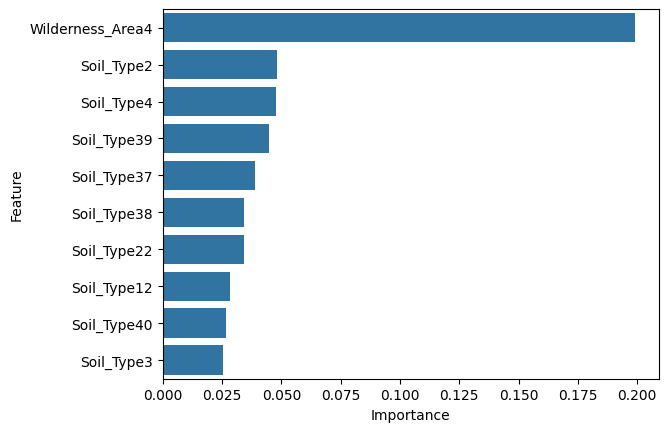

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

importances = model.feature_importances_

feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feat_imp_sorted = feat_imp.sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(feat_imp_sorted.head(10))
sns.barplot(x='Importance', y='Feature', data=feat_imp_sorted.head(10))

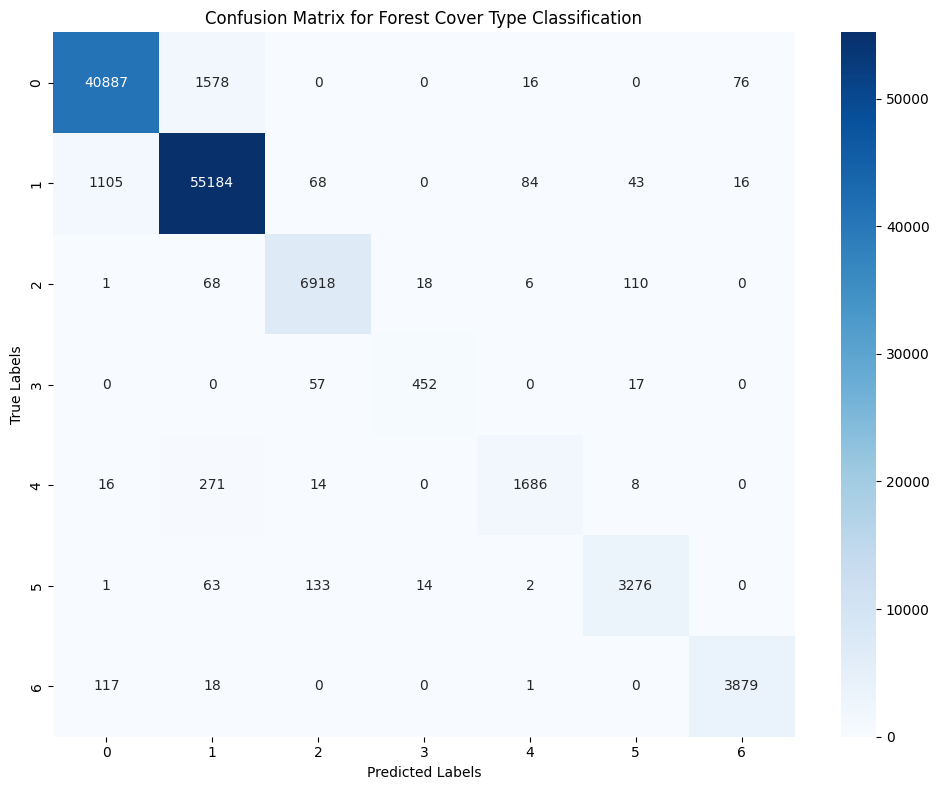

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, Y_Predict)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Forest Cover Type Classification")
plt.tight_layout()
plt.show()
